# 數學與圖像說明
以下程式維手刻出此Neural Network，在此以iris為範例，希望以iris的Sepal.Width變數以類神經做linear logistic regerssion分出是否為setosa品種

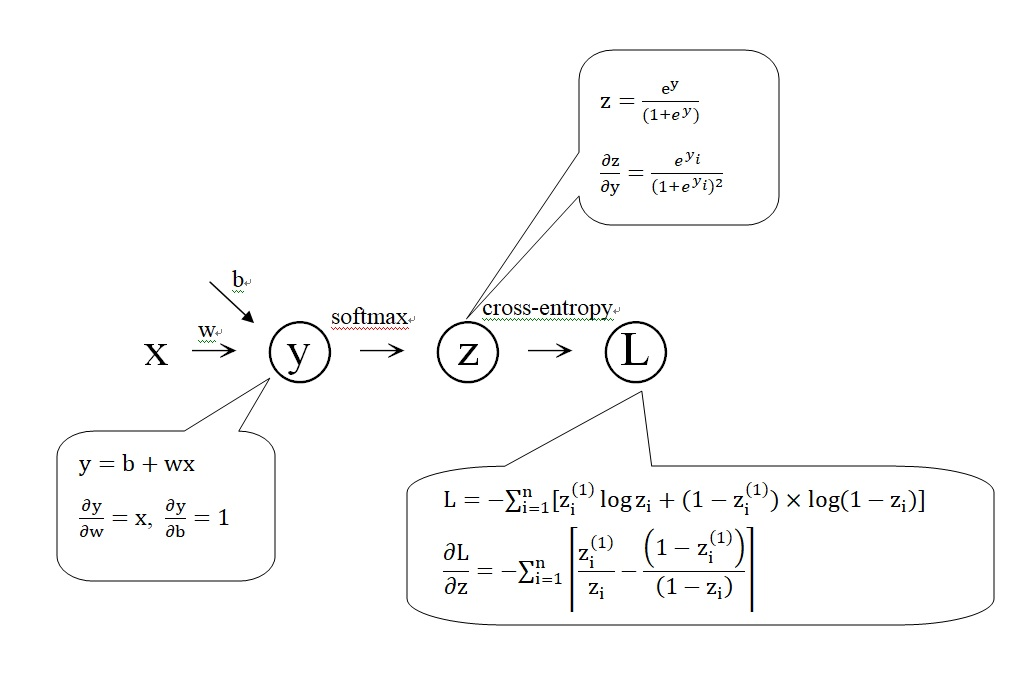

In [1]:
from IPython.display import Image
Image(filename='C:/Folder/Institute/論文/Picture/自動微分推導1.jpg') 

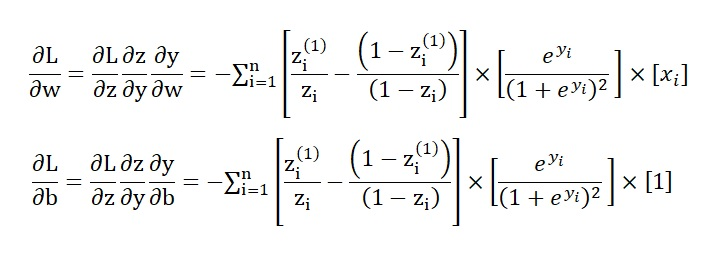

In [2]:
Image(filename='C:/Folder/Institute/論文/Picture/自動微分推導2.jpg') 

In [3]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
iris = datasets.load_iris()

In [5]:
inputiris = iris['data'].T[1]

建立類神經元

In [6]:
def Layer(x, par):
    x = np.append(np.ones(x.size),x).reshape(-1,x.size)
    y = np.dot(par,x)
    return({'y':y, 'par':par})

In [7]:
def softmax(y):
    return(np.exp(y) / (np.exp(y) + 1))

In [8]:
def output(par):
    y = Layer(inputiris, par)
    return({"output":softmax(y["y"]), "y":y["y"], "par": y["par"]})

In [9]:
def crossentropy(par):
    ans = iris['target'] == 0
    guess = output(par)
    z = sum(ans * np.log(guess['output']) + (1 - ans) * np.log(1 - guess['output']))
    if(np.isnan(z)):
        z = -5000
    return(-z)

In [10]:
crossentropy([1,1])

390.01474123773301

## 畫Loss function(X=weight, y=base, z=loss)

In [11]:
X = np.linspace(-20, 20, 200)
Y = np.linspace(-20, 20, 200)
X, Y = np.meshgrid(X, Y)
draw = np.array([X,Y]).T.reshape(-1,2)
Z = np.array([crossentropy(ele) for ele in draw]).reshape(200,-1)

C:\Users\burt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\Users\burt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


In [12]:
np.max(Z)

5000.0

<IPython.core.display.Javascript object>


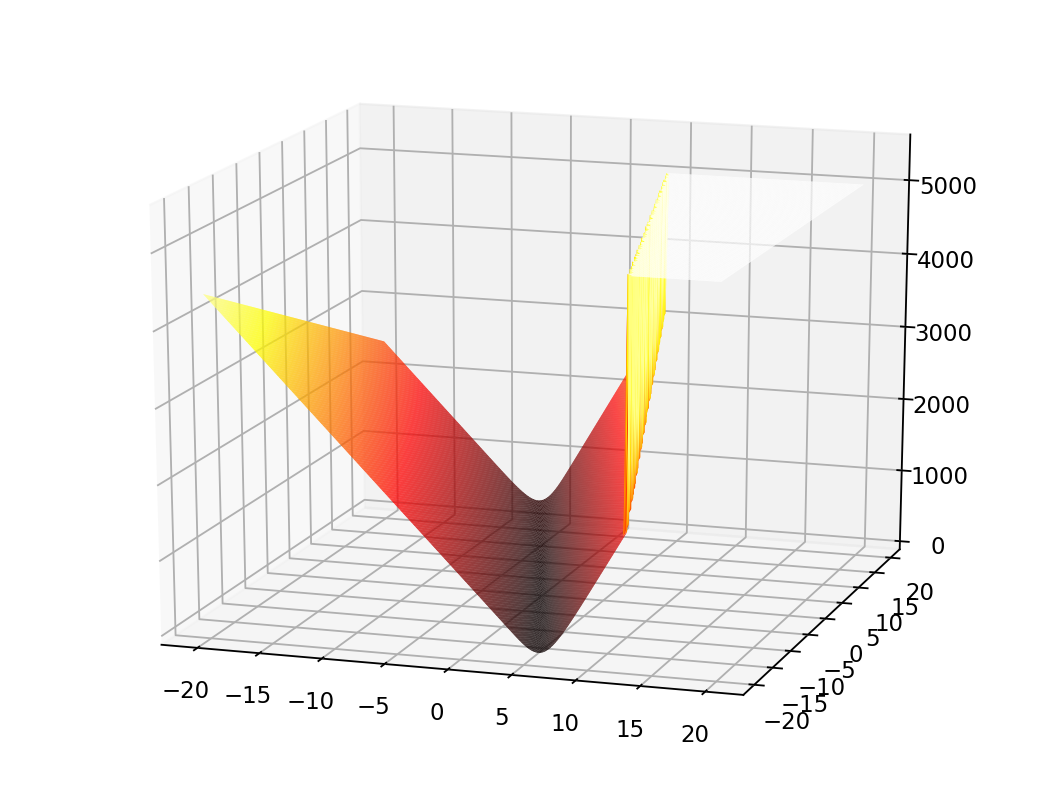

In [14]:
%matplotlib notebook
fig = plt.figure()
ax = Axes3D(fig)
ax.set_zlim(0, 5500)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('hot'))
plt.show()

## Automatic differentiation

In [15]:
def autodif(guess, ans):
    a1 = (ans / guess['output']) - ((1 - ans) / (1 - guess['output']))
    y = guess['y']
    a2 = np.exp(y) / (1 + np.exp(y))**2
    par1 = -sum(a1 * a2)
    par2 = -sum(a1 * a2 * inputiris)
    return([par1, par2])

epochs = 10000, lr = 0.007

In [16]:
ans = iris['target'] == 0
allpar=[]
par_new = [5,5]
lr = 0.007
#repeat{
for i in range(1,10000):
    allpar = allpar + list(par_new)
    par = par_new
    guess = output(par)
    par_new = np.array(par) + -lr * np.array(autodif(guess, ans))
    print(autodif(guess, ans))
#   par.new = apply(cbind(par, par.new), 1, function(x)
#     ifelse(abs(x[1] - x[2]) < 10e-15, x[1], x[2]))
    print(par_new)
#     print(par)
    print("-----------------------")
  # if(abs(sum(par-par.new)) < 10e-15||any(par.new == Inf)) break


[99.999998695084713, 287.19999680446853]
[ 4.30000001  2.98960002]
-----------------------
[99.999537883498832, 287.19880488470784]
[ 3.60000324  0.97920839]
-----------------------
[99.775959399837333, 286.5541303679957]
[ 2.90157153 -1.02667052]
-----------------------
[16.727340962130963, 26.170524020271834]
[ 2.78448014 -1.20986419]
-----------------------
[-5.2916429764135993, -40.866097230040737]
[ 2.82152164 -0.92380151]
-----------------------
[25.065845704228451, 52.139534362697113]
[ 2.64606072 -1.28877825]
-----------------------
[-15.54254288370498, -71.469928963891206]
[ 2.75485852 -0.78848875]
-----------------------
[37.567297198341301, 91.272995446981824]
[ 2.49188744 -1.42739972]
-----------------------
[-27.650172359626566, -107.19658260413829]
[ 2.68543865 -0.67702364]
-----------------------
[47.053686666638413, 121.20093115947878]
[ 2.35606284 -1.52543016]
-----------------------
[-34.255426398529998, -126.40298007528069]
[ 2.59585083 -0.6406093 ]
-----------------

-----------------------
[-10.624117852934901, -38.178535536540728]
[-9.5172712  2.9872946]
-----------------------
[12.977988021319904, 36.840968632707678]
[-9.60811712  2.72940782]
-----------------------
[-10.311593563793732, -37.148624169571193]
[-9.53593596  2.98944819]
-----------------------
[12.644305164769191, 35.817110597215333]
[-9.6244461   2.73872842]
-----------------------
[-9.9980494239255169, -36.11611667723907]
[-9.55445975  2.99154124]
-----------------------
[12.310057628708885, 34.790805039940921]
[-9.64063016  2.7480056 ]
-----------------------
[-9.683645034918813, -35.081532774972295]
[-9.57284464  2.99357633]
-----------------------
[11.975420317199994, 33.762596532157687]
[-9.65667259  2.75723815]
-----------------------
[-9.3685573636958601, -34.045447123507735]
[-9.59109268  2.99555628]
-----------------------
[11.640585812356084, 32.73308596835497]
[-9.67257678  2.76642468]
-----------------------
[-9.0529816887437669, -33.008492231167956]
[-9.60920591  2.99

-----------------------
[0.54125520980691211, -0.17020496106254046]
[-12.15445929   3.6767975 ]
-----------------------
[0.54049597295704854, -0.16996606213083909]
[-12.15824276   3.67798727]
-----------------------
[0.53973815959876592, -0.16972761161502803]
[-12.16202093   3.67917536]
-----------------------
[0.53898176603786141, -0.16948960835021143]
[-12.1657938    3.68036179]
-----------------------
[0.53822678859328599, -0.16925205117375253]
[-12.16956139   3.68154655]
-----------------------
[0.53747322359606964, -0.1690149389289346]
[-12.1733237    3.68272965]
-----------------------
[0.53672106739041803, -0.16877827046173222]
[-12.17708075   3.6839111 ]
-----------------------
[0.53597031633279235, -0.1685420446225474]
[-12.18083254   3.6850909 ]
-----------------------
[0.53522096679238862, -0.16830626026568896]
[-12.18457909   3.68626904]
-----------------------
[0.53447301515060319, -0.16807091624980819]
[-12.1883204    3.68744554]
-----------------------
[0.533726457801708

[0.33238324844383438, -0.10449960015560766]
[-13.26892823   4.02721694]
-----------------------
[0.3319770929507887, -0.10437186641622065]
[-13.27125207   4.02794755]
-----------------------
[0.33157154922324938, -0.10424432518493765]
[-13.27357307   4.02867726]
-----------------------
[0.3311666160521245, -0.1041169760826578]
[-13.27589124   4.02940608]
-----------------------
[0.33076229223219189, -0.10398981872803159]
[-13.27820658   4.03013401]
-----------------------
[0.33035857656065148, -0.10386285274376861]
[-13.28051909   4.03086105]
-----------------------
[0.32995546783834523, -0.10373607775102722]
[-13.28282877   4.0315872 ]
-----------------------
[0.32955296486894536, -0.10360949337388736]
[-13.28513564   4.03231246]
-----------------------
[0.32915106645930881, -0.10348309923576726]
[-13.2874397    4.03303685]
-----------------------
[0.32874977141920181, -0.10335689496299805]
[-13.28974095   4.03376034]
-----------------------
[0.3283490785620371, -0.10323088017994964]


[0.18833553726179084, -0.059204006906092621]
[-14.13740896   4.30024438]
-----------------------
[0.18812842552711082, -0.059138889987533916]
[-14.13872585   4.30065835]
-----------------------
[0.18792157429973869, -0.059073854998507369]
[-14.14004131   4.30107187]
-----------------------
[0.18771498317924004, -0.059008901812719672]
[-14.14135531   4.30148493]
-----------------------
[0.1875086517656098, -0.058944030304627137]
[-14.14266787   4.30189754]
-----------------------
[0.1873025796599779, -0.058879240348243433]
[-14.14397899   4.30230969]
-----------------------
[0.18709676646391918, -0.058814531818713656]
[-14.14528867   4.3027214 ]
-----------------------
[0.18689121178010629, -0.058749904590189028]
[-14.1465969    4.30313265]
-----------------------
[0.18668591521150527, -0.058685358538924537]
[-14.14790371   4.30354344]
-----------------------
[0.18648087636238825, -0.058620893539441221]
[-14.14920907   4.30395379]
-----------------------
[0.18627609483755628, -0.0585565

[0.12259813959236515, -0.038537063901888713]
[-14.56620627   4.43503468]
-----------------------
[0.12247005923148002, -0.038496799495488343]
[-14.56706356   4.43530416]
-----------------------
[0.1223421257299723, -0.038456581265885914]
[-14.56791996   4.43557335]
-----------------------
[0.12221433889188499, -0.03841640915117206]
[-14.56877546   4.43584227]
-----------------------
[0.12208669852165596, -0.038376283090296837]
[-14.56963007   4.4361109 ]
-----------------------
[0.12195920442396713, -0.038336203021583914]
[-14.57048378   4.43637925]
-----------------------
[0.12183185640402017, -0.038296168883434678]
[-14.5713366    4.43664733]
-----------------------
[0.12170465426694882, -0.038256180615371171]
[-14.57218854   4.43691512]
-----------------------
[0.1215775978186861, -0.038216238155287963]
[-14.57303958   4.43718263]
-----------------------
[0.12145068686490029, -0.038176341443536987]
[-14.57388973   4.43744987]
-----------------------
[0.12132392121241373, -0.03813649

[0.078083010172869699, -0.024543442142072047]
[-14.86955257   4.53038572]
-----------------------
[0.078004317118298749, -0.024518705385815576]
[-14.8700986    4.53055735]
-----------------------
[0.077925708441592079, -0.02449399515611983]
[-14.87064408   4.53072881]
-----------------------
[0.077847184041655831, -0.024469311422235962]
[-14.87118902   4.53090009]
-----------------------
[0.077768743818279751, -0.024444654151274836]
[-14.8717334    4.53107121]
-----------------------
[0.077690387670596411, -0.024420023312854977]
[-14.87227723   4.53124215]
-----------------------
[0.077612115498551487, -0.024395418874538777]
[-14.87282051   4.53141291]
-----------------------
[0.077533927201843794, -0.024370840805297278]
[-14.87336325   4.53158351]
-----------------------
[0.077455822680452813, -0.02434628907345282]
[-14.87390544   4.53175393]
-----------------------
[0.077377801834415422, -0.02432176364780203]
[-14.87444709   4.53192419]
-----------------------
[0.077299864564047305, 

-----------------------
[0.048098108946807772, -0.015118073413011746]
[-15.08020139   4.5965971 ]
-----------------------
[0.048050823121654734, -0.015103210083588947]
[-15.08053775   4.59670283]
-----------------------
[0.048003585650637615, -0.01508836195413199]
[-15.08087377   4.59680845]
-----------------------
[0.047956396480345581, -0.015073529008718722]
[-15.08120947   4.59691396]
-----------------------
[0.047909255558043401, -0.015058711229418709]
[-15.08154483   4.59701937]
-----------------------
[0.047862162830387994, -0.015043908601044875]
[-15.08187987   4.59712468]
-----------------------
[0.047815118244774829, -0.015029121105592069]
[-15.08221457   4.59722988]
-----------------------
[0.047768121748060222, -0.015014348727440341]
[-15.08254895   4.59733498]
-----------------------
[0.047721173287602225, -0.01499959144938523]
[-15.082883     4.59743998]
-----------------------
[0.047674272810630469, -0.014984849255228694]
[-15.08321672   4.59754487]
----------------------

[0.03439483780221958, -0.010810778454377168]
[-15.17823701   4.62741124]
-----------------------
[0.034361410582712693, -0.010800271525060356]
[-15.17847754   4.62748684]
-----------------------
[0.034328016791577431, -0.010789775102991062]
[-15.17871783   4.62756237]
-----------------------
[0.034294656393206779, -0.010779289177859086]
[-15.1789579    4.62763782]
-----------------------
[0.034261329352555964, -0.010768813738293859]
[-15.17919773   4.6277132 ]
-----------------------
[0.03422803563442009, -0.010758348773270199]
[-15.17943732   4.62778851]
-----------------------
[0.034194775203608058, -0.01074789427183398]
[-15.17967669   4.62786375]
-----------------------
[0.034161548025094385, -0.010737450222875533]
[-15.17991582   4.62793891]
-----------------------
[0.034128354063804656, -0.0107270166153276]
[-15.18015471   4.628014  ]
-----------------------
[0.034095193284658321, -0.010716593438167221]
[-15.18039338   4.62808901]
-----------------------
[0.034062065652686435, -0

[0.021336589691363955, -0.0067063189606685336]
[-15.2727195    4.65710825]
-----------------------
[0.021316081426037387, -0.0066998728840325095]
[-15.27286871   4.65715515]
-----------------------
[0.021295593230194726, -0.0066934331161462302]
[-15.27301778   4.657202  ]
-----------------------
[0.021275125083618174, -0.0066869996496878858]
[-15.27316671   4.65724881]
-----------------------
[0.021254676965777985, -0.0066805724792693422]
[-15.27331549   4.65729558]
-----------------------
[0.02123424885667613, -0.0066741515978201438]
[-15.27346413   4.6573423 ]
-----------------------
[0.021213840735857192, -0.0066677369992771407]
[-15.27361263   4.65738897]
-----------------------
[0.021193452583044642, -0.0066613286772578828]
[-15.27376098   4.6574356 ]
-----------------------
[0.021173084378164592, -0.0066549266254718464]
[-15.27390919   4.65748218]
-----------------------
[0.021152736101064495, -0.0066485308371343477]
[-15.27405726   4.65752872]
-----------------------
[0.02113240

[0.015311342258549687, -0.0048124961256942322]
[-15.31667002   4.67092234]
-----------------------
[0.015296700713034683, -0.0048078940973634854]
[-15.3167771    4.67095599]
-----------------------
[0.015282073351563258, -0.0048032965272440942]
[-15.31688407   4.67098962]
-----------------------
[0.015267460159982177, -0.0047987034108692983]
[-15.31699095   4.67102321]
-----------------------
[0.015252861124150002, -0.0047941147439718446]
[-15.31709772   4.67105677]
-----------------------
[0.015238276229952191, -0.0047895305224929796]
[-15.31720439   4.67109029]
-----------------------
[0.015223705463661807, -0.0047849507408584957]
[-15.31731095   4.67112379]
-----------------------
[0.015209148810777479, -0.0047803753962705198]
[-15.31741742   4.67115725]
-----------------------
[0.015194606257663168, -0.0047758044828398738]
[-15.31752378   4.67119068]
-----------------------
[0.015180077790062585, -0.0047712379973110508]
[-15.31763004   4.67122408]
-----------------------
[0.0151655

[0.009611316434765288, -0.0030209118190136497]
[-15.35845723   4.68405641]
-----------------------
[0.0096021702831176614, -0.0030180370906545129]
[-15.35852445   4.68407754]
-----------------------
[0.0095930329068352471, -0.0030151651198114804]
[-15.3585916    4.68409865]
-----------------------
[0.0095839042969357024, -0.0030122959050880027]
[-15.35865868   4.68411973]
-----------------------
[0.0095747844451682385, -0.0030094294428713031]
[-15.35872571   4.6841408 ]
-----------------------
[0.0095656733429846652, -0.0030065657304024773]
[-15.35879267   4.68416184]
-----------------------
[0.0095565709815408351, -0.0030037047661306548]
[-15.35885956   4.68418287]
-----------------------
[0.0095474773528815837, -0.0030008465454915978]
[-15.3589264    4.68420388]
-----------------------
[0.0095383924477764337, -0.0029979910682859101]
[-15.35899316   4.68422486]
-----------------------
[0.0095293162584259017, -0.0029951383293347345]
[-15.35905987   4.68424583]
-----------------------
[

[0.0068577677277453786, -0.0021554452716092687]
[-15.37871697   4.6904242 ]
-----------------------
[0.0068512572602169863, -0.0021533989744083604]
[-15.37876493   4.69043927]
-----------------------
[0.0068447530097993092, -0.0021513546310769627]
[-15.37881284   4.69045433]
-----------------------
[0.0068382549705418849, -0.0021493122400726428]
[-15.37886071   4.69046938]
-----------------------
[0.0068317631363727926, -0.0021472717994439616]
[-15.37890853   4.69048441]
-----------------------
[0.0068252775014122358, -0.0021452333070596241]
[-15.37895631   4.69049943]
-----------------------
[0.0068187980594598685, -0.0021431967614775616]
[-15.37900404   4.69051443]
-----------------------
[0.0068123248047510243, -0.0021411621604824349]
[-15.37905173   4.69052942]
-----------------------
[0.0068058577311616575, -0.0021391295024233425]
[-15.37909937   4.69054439]
-----------------------
[0.0067993968328791399, -0.0021370987849650414]
[-15.37914696   4.69055935]
-----------------------


[-15.39715479   4.69621933]
-----------------------
[0.0043533674892528018, -0.0013682917259350003]
[-15.39718526   4.69622891]
-----------------------
[0.0043492434782216038, -0.001366995517787073]
[-15.39721571   4.69623848]
-----------------------
[0.0043451233884284901, -0.0013657005424748681]
[-15.39724612   4.69624804]
-----------------------
[0.0043410072163257984, -0.0013644067983831221]
[-15.39727651   4.69625759]
-----------------------
[0.0043368949580092353, -0.0013631142843464339]
[-15.39730687   4.69626713]
-----------------------
[0.0043327866097701007, -0.0013618229995537856]
[-15.3973372    4.69627666]
-----------------------
[0.0043286821679712761, -0.0013605329422641255]
[-15.3973675    4.69628619]
-----------------------
[0.0043245816287667549, -0.0013592441117273868]
[-15.39739777   4.6962957 ]
-----------------------
[0.0043204849883614338, -0.0013579565067373123]
[-15.39742801   4.69630521]
-----------------------
[0.0043163922431692647, -0.0013566701258269642]
[

[-15.40599477   4.69899779]
-----------------------
[0.0031576602221325689, -0.00099247221673448571]
[-15.40601687   4.69900474]
-----------------------
[0.0031546719992849859, -0.0009915329976394327]
[-15.40603895   4.69901168]
-----------------------
[0.0031516866120981091, -0.00099059466926521011]
[-15.40606101   4.69901862]
-----------------------
[0.0031487040576533287, -0.0009896572319062491]
[-15.40608305   4.69902554]
-----------------------
[0.0031457243334533647, -0.00098872068362221288]
[-15.40610507   4.69903246]
-----------------------
[0.0031427474366369779, -0.00098778502430274528]
[-15.40612707   4.69903938]
-----------------------
[0.0031397733646699733, -0.0009868502523842082]
[-15.40614905   4.69904629]
-----------------------
[0.0031368021146106206, -0.00098591636822698003]
[-15.40617101   4.69905319]
-----------------------
[0.0031338336841428838, -0.00098498336930619157]
[-15.40619295   4.69906008]
-----------------------
[0.0031308680700944391, -0.000984051256553

[0.0020049414223972106, -0.00063016496727996696]
[-15.41453958   4.70168348]
-----------------------
[0.0020030459473144857, -0.0006295692072986192]
[-15.41455361   4.70168789]
-----------------------
[0.0020011522672727655, -0.0006289740116338649]
[-15.41456761   4.70169229]
-----------------------
[0.0019992603806888998, -0.00062837937955717571]
[-15.41458161   4.70169669]
-----------------------
[0.001997370285772293, -0.00062778531052698483]
[-15.41459559   4.70170108]
-----------------------
[0.0019954819807560809, -0.00062719180415482523]
[-15.41460956   4.70170548]
-----------------------
[0.0019935954640193099, -0.00062659885997540243]
[-15.41462351   4.70170986]
-----------------------
[0.0019917107339350593, -0.00062600647688570987]
[-15.41463746   4.70171424]
-----------------------
[0.0019898277885918858, -0.00062541465539156516]
[-15.41465138   4.70171862]
-----------------------
[0.0019879466265662338, -0.00062482339384528629]
[-15.4146653    4.70172299]
-----------------

-----------------------
[0.0014359352674708226, -0.00045132275938231103]
[-15.4187497    4.70300675]
-----------------------
[0.0014345783972611326, -0.00045089628697503326]
[-15.41875974   4.7030099 ]
-----------------------
[0.0014332228109681378, -0.00045047021765987072]
[-15.41876978   4.70301306]
-----------------------
[0.0014318685070688342, -0.00045004455167774182]
[-15.4187798    4.70301621]
-----------------------
[0.0014305154844986567, -0.00044961928855180577]
[-15.41878981   4.70301935]
-----------------------
[0.001429163742082129, -0.00044919442737723081]
[-15.41879982   4.7030225 ]
-----------------------
[0.0014278132784783792, -0.00044876996848475237]
[-15.41880981   4.70302564]
-----------------------
[0.0014264640925911176, -0.00044834591102627108]
[-15.4188198    4.70302878]
-----------------------
[0.0014251161830863834, -0.00044792225493095472]
[-15.41882977   4.70303191]
-----------------------
[0.0014237695489328628, -0.00044749899946117111]
[-15.41883974   4.7

[0.00090280119556293559, -0.00028375551824999512]
[-15.42269627   4.70424718]
-----------------------
[0.00090194849628039142, -0.00028348750964757308]
[-15.42270259   4.70424916]
-----------------------
[0.00090109660291448623, -0.00028321975464995486]
[-15.4227089    4.70425114]
-----------------------
[0.00090024551485612392, -0.00028295225246599554]
[-15.4227152    4.70425312]
-----------------------
[0.00089939523117549269, -0.00028268500364747595]
[-15.42272149   4.7042551 ]
-----------------------
[0.00089854575136208426, -0.00028241800678718842]
[-15.42272778   4.70425708]
-----------------------
[0.00089769707432585388, -0.00028215126281094793]
[-15.42273407   4.70425905]
-----------------------
[0.00089684919964119758, -0.0002818847706754779]
[-15.42274035   4.70426103]
-----------------------
[0.00089600212624116327, -0.00028161853075692189]
[-15.42274662   4.704263  ]
-----------------------
[0.00089515585362373584, -0.00028135254216388184]
[-15.42275288   4.70426497]
-----

[-15.4245514    4.70483025]
-----------------------
[0.00065166565548127608, -0.00020482215808614868]
[-15.42455596   4.70483169]
-----------------------
[0.00065105028796563769, -0.00020462874451476765]
[-15.42456052   4.70483312]
-----------------------
[0.00065043550190332922, -0.00020443551351523315]
[-15.42456507   4.70483455]
-----------------------
[0.0006498212965579675, -0.00020424246554273662]
[-15.42456962   4.70483598]
-----------------------
[0.00064920767167991889, -0.0002040495995008218]
[-15.42457416   4.70483741]
-----------------------
[0.00064859462643432342, -0.00020385691608160172]
[-15.4245787    4.70483883]
-----------------------
[0.00064798216058553626, -0.00020366441421493242]
[-15.42458324   4.70484026]
-----------------------
[0.00064737027324790475, -0.00020347209480608974]
[-15.42458777   4.70484168]
-----------------------
[0.00064675896416743761, -0.00020327995653290909]
[-15.4245923    4.70484311]
-----------------------
[0.00064614823251624154, -0.0002

[0.00042882643972771972, -0.00013478252347465247]
[-15.42620644   4.70535044]
-----------------------
[0.00042842157704658934, -0.00013465527261014021]
[-15.42620944   4.70535138]
-----------------------
[0.00042801709662926291, -0.00013452814229064636]
[-15.42621244   4.70535233]
-----------------------
[0.00042761299829741084, -0.00013440113157048295]
[-15.42621543   4.70535327]
-----------------------
[0.00042720928151851467, -0.00013427424142453681]
[-15.42621842   4.70535421]
-----------------------
[0.0004268059461317586, -0.00013414747073192679]
[-15.42622141   4.70535515]
-----------------------
[0.00042640299171134433, -0.00013402081978475255]
[-15.42622439   4.70535608]
-----------------------
[0.00042600041777132724, -0.00013389428855115071]
[-15.42622738   4.70535702]
-----------------------
[0.00042559822404961145, -0.00013376787696162129]
[-15.42623035   4.70535796]
-----------------------
[0.00042519641022534249, -0.00013364158461126596]
[-15.42623333   4.70535889]
-----

[0.00029753382774821979, -9.3516519040104384e-05]
[-15.42717902   4.70565613]
-----------------------
[0.00029725295254298678, -9.3428238200132796e-05]
[-15.4271811    4.70565678]
-----------------------
[0.00029697234241904402, -9.334004131233975e-05]
[-15.42718318   4.70565744]
-----------------------
[0.00029669199751330977, -9.3251926833737286e-05]
[-15.42718526   4.70565809]
-----------------------
[0.00029641191706128445, -9.3163896420223047e-05]
[-15.42718734   4.70565874]
-----------------------
[0.00029613210128545675, -9.3075948479293125e-05]
[-15.42718941   4.70565939]
-----------------------
[0.00029585254956732143, -9.298808390156843e-05]
[-15.42719148   4.70566004]
-----------------------
[0.0002955732618655782, -9.2900302331222484e-05]
[-15.42719355   4.70566069]
-----------------------
[0.00029529423792645781, -9.2812603423420015e-05]
[-15.42719562   4.70566134]
-----------------------
[0.00029501547744553713, -9.2724987492465161e-05]
[-15.42719768   4.70566199]
-------

[-15.42782909   4.70586045]
-----------------------
[0.00020958899213510684, -6.5874968862789096e-05]
[-15.42783056   4.70586091]
-----------------------
[0.00020939115281590204, -6.5812786760988118e-05]
[-15.42783202   4.70586137]
-----------------------
[0.0002091935002328793, -6.575066363434523e-05]
[-15.42783349   4.70586183]
-----------------------
[0.00020899603435167724, -6.5688598875790483e-05]
[-15.42783495   4.70586229]
-----------------------
[0.00020879875481491506, -6.5626592868350819e-05]
[-15.42783641   4.70586275]
-----------------------
[0.0002086016616034414, -6.5564645269966526e-05]
[-15.42783787   4.70586321]
-----------------------
[0.00020840475437999828, -6.5502756413149399e-05]
[-15.42783933   4.70586367]
-----------------------
[0.00020820803315213521, -6.544092570348603e-05]
[-15.42784079   4.70586413]
-----------------------
[0.0002080114975709646, -6.5379153546540891e-05]
[-15.42784225   4.70586458]
-----------------------
[0.0002078151475692902, -6.53174397

[-15.4283672    4.70602958]
-----------------------
[0.00013702854745792359, -4.30688207790908e-05]
[-15.42836816   4.70602988]
-----------------------
[0.0001368992088340848, -4.3028169177339315e-05]
[-15.42836911   4.70603018]
-----------------------
[0.00013676999240616605, -4.298755566323198e-05]
[-15.42837007   4.70603048]
-----------------------
[0.0001366408978672462, -4.2946980503999477e-05]
[-15.42837103   4.70603078]
-----------------------
[0.00013651192521604849, -4.2906443939338956e-05]
[-15.42837198   4.70603108]
-----------------------
[0.0001363830744706418, -4.2865944976822057e-05]
[-15.42837294   4.70603138]
-----------------------
[0.00013625434510833312, -4.2825485188080492e-05]
[-15.42837389   4.70603168]
-----------------------
[0.00013612573747170953, -4.2785062709937982e-05]
[-15.42837485   4.70603198]
-----------------------
[0.00013599725113169758, -4.2744678857231655e-05]
[-15.4283758    4.70603228]
-----------------------
[0.00013586888615568782, -4.27043328

-----------------------
[0.00010862352432297606, -3.4140966393647609e-05]
[-15.42857862   4.70609603]
-----------------------
[0.0001085209992863212, -3.4108742094973721e-05]
[-15.42857938   4.70609627]
-----------------------
[0.00010841857098059515, -3.407654810083649e-05]
[-15.42858014   4.70609651]
-----------------------
[0.00010831623928597711, -3.404438504206464e-05]
[-15.42858089   4.70609675]
-----------------------
[0.00010821400431276773, -3.4012251674653271e-05]
[-15.42858165   4.70609698]
-----------------------
[0.00010811186569420483, -3.3980149250600888e-05]
[-15.42858241   4.70609722]
-----------------------
[0.00010800982359659983, -3.3948076672563055e-05]
[-15.42858316   4.70609746]
-----------------------
[0.00010790787781977951, -3.3916034632208714e-05]
[-15.42858392   4.7060977 ]
-----------------------
[0.00010780602826240826, -3.3884022677010961e-05]
[-15.42858467   4.70609793]
-----------------------
[0.0001077042748155177, -3.3852041051884996e-05]
[-15.4285854

若以直接以統計之logistic regression可求得(base,weight)兩個參數為約為(-15.72,4.79)，與所得相去不遠 

In [17]:
par_new

array([-15.42884263,   4.70617901])

loss 的等高線圖

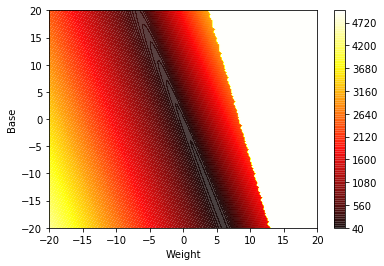

In [22]:
line = np.array(allpar).reshape(-1, 2)[:10000].T
%matplotlib inline
C = plt.contourf(X, Y, Z, 150, linewidth=.5, alpha=.75, cmap=plt.cm.hot, origin='lower')
plt.colorbar(C)
plt.xlabel("Weight")
plt.ylabel("Base")
plt.show()

Par Learning的狀況

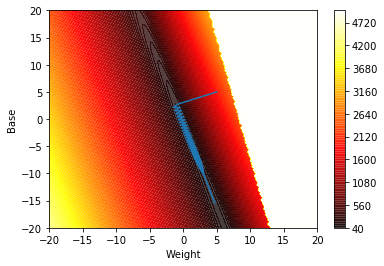

In [23]:
C = plt.contourf(X, Y, Z, 150, linewidth=.5, alpha=.75, cmap=plt.cm.hot, origin='lower')
plt.colorbar(C)
plt.plot(line[1][np.arange(0,10000,7)], line[0][np.arange(0,10000,7)])
plt.xlabel("Weight")
plt.ylabel("Base")
plt.show()

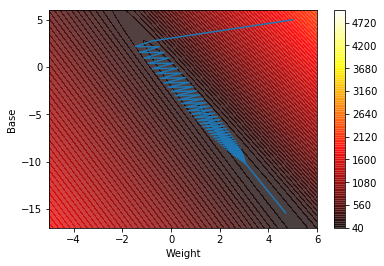

In [27]:
C = plt.contourf(X, Y, Z, 150, linewidth=.5, alpha=.75, cmap=plt.cm.hot, origin='lower')
# adding label
# plt.clabel(C, inline=True, fontsize=10)
plt.colorbar(C)
plt.plot(line[1][np.arange(0,10000,7)], line[0][np.arange(0,10000,7)])
plt.xlim(-5, 6)
plt.ylim(-17, 6)
plt.xlabel("Weight")
plt.ylabel("Base")
#plt.xticks(())
#plt.yticks(())
plt.show()